## UFRN - EEC2006 - TOPICOS ESPECIAIS F
## Terceiro trabalho 

Componentes:
* **20171021275 - Fabio Fonseca de Oliveira**
* **2016102462 - Júlio César Melo Gomes de Oliveira**
* **20171021201 - Tiago Fernandes de Miranda**

Notebook com solução do terceiro trabalho proposto na disciplina. A seguir breve descrição de cada solução bem como suas informações específicas.

A segunda parte da solução, apresenta o procedimento utilizado para a identificação do gênero usando o nome do servido. Foram utilizados duas APIs o Genderize e o GenderBR.

In [2]:
import pandas as pd
from genderize import Genderize

In [2]:
# Organição dos dados a partir do primeiro nome dos servidores para acelerar a classificação dos sexos
# a partir do primeiro nome posteriormente dos não classificados  são usados o segundo

nomes = pd.read_csv('func_scraping_df.csv')

ListaNomes = nomes['Serv_name']

for index,nome in ListaNomes.items():
    ListaNomes[index] = ListaNomes[index].split(' ', 1 )[0]
    
ListaNomesSemDuplicatas = []
for nome in ListaNomes:
    if nome not in ListaNomesSemDuplicatas:
        ListaNomesSemDuplicatas.append(nome)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [ ]:
#Classificação do sexo dos servidores pelo primeiro nome pelo genderize em um 'range'
nomes = pd.read_csv('ListaPrimeirosNomesSemDuplicatas.csv')
ListaNomes = nomes['Nome']
LstGenFunc = []
for index in ListaNomes[0:].items():
    LstGenFunc.append(Genderize().get([index[0]]))

In [ ]:
#Armazenando do sexo dos servidores
ListaGen = pd.read_csv('SexoServidores.csv')
count = 0
for index in LstGenFunc[0]:
    ListaGen.iloc[count + len(ListaGen)] = index
    count += 1

In [78]:
#Geração de uma tabela nova com a partir da classficação do primeiro nome
name_2 = []
gender_2 = []
probability_2 = []
count_2 = []
for p in LstGenFunc:
    name_2.append(p[0]['name'])    
    if p[0]['gender'] != None:
        gender_2.append(p[0]['gender'])
        probability_2.append(p[0]['probability'])
        count_2.append(p[0]['count'])
    else:
        gender_2.append('None')
        probability_2.append('')
        count_2.append('')
func1_scraping_df = pd.DataFrame({'name': name_2,
                       'gender': gender_2,
                       'probability': probability_2,
                       'count':count_2})
print(func1_scraping_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 4 columns):
count          796 non-null object
gender         796 non-null object
name           796 non-null object
probability    796 non-null object
dtypes: object(4)
memory usage: 25.0+ KB
None


In [79]:
func1_scraping_df.to_csv('SexoServidores_2.csv')

In [1]:
from requests import get
from bs4 import BeautifulSoup
from time import sleep
from random import randint
from time import time
from warnings import warn
from IPython.core.display import clear_output
import pandas as pd

In [32]:
#Biblioteca gender BR
import rpy2.interactive as r
import rpy2.interactive.packages
r.packages.importr("genderBR")
rlib =  r.packages.packages
rlib.genderBR
    

male


In [40]:
# Classficando os primeiros nomes restantes a partir do genderBR
LstGenFunc = []
for i,serv in ListaGen.iterrows():    
    if (serv['gender'] == 'None') and (len(serv['name']) > 0):
        serv_gen = rlib.genderBR.get_gender(serv['name'])
        #print(serv['name'], str.lower(serv_gen[0])) 
        print(serv['name'])
        if serv_gen[0] is not serv_gen.NAvalue:
            ListaGen.loc[i,'gender'] = str.lower(serv_gen[0])        
            print(serv['name'], serv_gen) 
            
        
    

ABMAEL
ABMAEL [1] "Male"

ACILENE
ACILENE [1] "Female"

ACSA
ACSA [1] "Female"

ACYNELLY
ADAILDE
ADAILDO
ADAILDO [1] "Male"

ADAILSON
ADAILSON [1] "Male"

ADALA
ADALA [1] "Female"

ADEILDE
ADEILDE [1] "Female"

ADEILZE
ADEILZE [1] "Female"

ADELARDO
ADELARDO [1] "Male"

ADENILDA
ADENILDA [1] "Female"

ADENYLZA
ADILIANE
ADILIANE [1] "Female"

ADLAREG
ADLEY
ADLEY [1] "Male"

ADRIAO
ADRIAO [1] "Male"

AGAMENON
AGAMENON [1] "Male"

AIRAN
AISLANIA
AISLANIA [1] "Female"

AKALINE
ALBANYRA
ALBIMAR
ALBIMAR [1] "Male"

ALCILEA
ALCILEA [1] "Female"

ALCILEIA
ALCILEIA [1] "Female"

ALCIVAN
ALCIVAN [1] "Male"

ALDACI
ALDAYR
ALDAYR [1] "Male"

ALDENOR
ALDENOR [1] "Male"

ALDOMAR
ALDOMAR [1] "Male"

ALIANDA
ALIANDA [1] "Female"

ALLYNE
ALLYNE [1] "Female"

ALMAN
ALMARIA
ALTAIVA
ALTENIR
ALUIZIO
ALUIZIO [1] "Male"

ALVESSENA
ALZENI
ALZENI [1] "Female"

ALZIVANY
AMADJA
AMALUSIA
AMANTINO
AMANTINO [1] "Male"

AMARINO
AMARINO [1] "Male"

AMOYSA
ANAJULIA
ANAJULIA [1] "Female"

ANATALIA
ANATALIA [1] "Female"

JEIEL [1] "Male"

JEKSON
JEKSON [1] "Male"

JERFFESON
JERFFESON [1] "Male"

JESAIAS
JESAIAS [1] "Male"

JESONIAS
JESONIAS [1] "Male"

JESSICLEY
JOACY
JOACY [1] "Male"

JOADE
JOADE [1] "Male"

JOADETE
JOADIR
JOADIR [1] "Male"

JOANILDA
JOANILDA [1] "Female"

JOATA
JOATA [1] "Male"

JOATAN
JOATAN [1] "Male"

JOATAO
JOATAO [1] "Male"

JOCEKLEYTON
JOCELIA
JOCELIA [1] "Female"

JOCIANE
JOCIANE [1] "Female"

JODEYLSON
JOELZA
JOELZA [1] "Female"

JOHNNATAS
JOIZA
JOIZA [1] "Female"

JONIA
JONIA [1] "Female"

JOSAIR
JOSAIR [1] "Male"

JOSALMIR
JOSCELIANO
JOSEILCE
JOSELENO
JOSELENO [1] "Male"

JOSELLY
JOSELLY [1] "Female"

JOSEMERY
JOSEMERY [1] "Female"

JOSENALDE
JOSENBERG
JOSENBERG [1] "Male"

JOSENEIDE
JOSENEIDE [1] "Female"

JOSERLANDIA
JOSERLANDIA [1] "Female"

JOSIANA
JOSIANA [1] "Female"

JOSIBEL
JOSILDA
JOSILDA [1] "Female"

JOSILETE
JOSILETE [1] "Female"

JOSINALDO
JOSINALDO [1] "Male"

JOSINEIDE
JOSINEIDE [1] "Female"

JOSIVANIA
JOSIVANIA [1] "Female"

JOSSANA
JOSSANA [1] "Female"

JOY


UILIETE
UIRA
VALBER
VALBER [1] "Male"

VALDECIO
VALDECIO [1] "Male"

VALDECY
VALDEMIR
VALDEMIR [1] "Male"

VALDENIA
VALDENIA [1] "Female"

VALDENIDES
VALDENIDES [1] "Female"

VALDIRA
VALDIRA [1] "Female"

VALDSON
VALDSON [1] "Male"

VALTEMIA
VAMBERTO
VAMBERTO [1] "Male"

VANCI
VANDINER
VANILDO
VANILDO [1] "Male"

VANISSE
VANISSE [1] "Female"

VANUZIA
VANUZIA [1] "Female"

VENERANDO
VENERANDO [1] "Male"

VENILSON
VENILSON [1] "Male"

VERBENA
VERBENA [1] "Female"

VERIDIANO
VERIDIANO [1] "Male"

VESCIO
VILANI
VILANI [1] "Female"

VITTOR
VITTOR [1] "Male"

VOLNEY
VOLNEY [1] "Male"

WADLEIGHN
WALANNE
WALDECIO
WALDECIO [1] "Male"

WALDENICE
WALDENICE [1] "Female"

WALLACY
WALLACY [1] "Male"

WALNESIA
WALTECA
WANDERLEIA
WANDERLEIA [1] "Female"

WANUSIA
WANUSIA [1] "Female"

WARLEY
WARLEY [1] "Male"

WATTSON
WATTSON [1] "Male"

WEDNEY
WEDNEY [1] "Male"

WICLIFFE
WILACI
WILLAME
WILLAME [1] "Male"

WILSYNNARA
WOUBER
XISTO
XISTO [1] "Male"

YANAK
YCARO
YCARO [1] "Male"

YOLE
YOLE [1] "Female"



In [3]:
ListaGen = pd.read_csv('ServidoresTotalGender.csv')
ListaGen.head()

,Unnamed: 0,Unnamed: 0.1,count,gender,name,probability
0,0,0,80.0,male,ABDO,0.99
1,1,1,NaN,male,ABMAEL,NaN
2,2,2,21.0,male,ABNER,0.95
3,3,3,1.0,male,ABRAHAO,1.00
4,4,4,9.0,female,ACACIA,1.00


In [4]:
#Nomes restantes que não foram classificados 262
count = 0
for i,serv in ListaGen.iterrows():    
    if (serv['gender'] == 'None'):
        count += 1
print(count)

259


In [92]:
#Classificação usando o portal 'dicionariodenomesproprios' para classificar os primeiros nomes classificação de 3

#start_time = time()
requests = 0    
gender_dic = ''

for i,serv in ListaGen.iterrows():
    if (serv['gender'] == 'None') and (len(serv['name']) > 0):
        url ='https://www.dicionariodenomesproprios.com.br/{}/'.format(serv['name']).replace(" ", "")
        #url ='https://www.dicionariodenomesproprios.com.br/fabio/'

        # Make a get request
        response = get(url)

        if response.status_code != 404:
            

            html_soup = BeautifulSoup(response.text, 'html.parser')
            type(html_soup)
            #print('Entrada')
            # Pause the loop
            sleep(randint(2,4))

            # Monitor the requests
            #requests += 1
            #elapsed_time = time() - start_time
            #print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
            #clear_output(wait = True)

            # Throw a warning for non-200 status codes
            if response.status_code != 200:
                warn('Request: {}; Status code: {}'.format(requests, response.status_code))
            #print(response.status_code)

            #print(len(unit_table))
            unit_table = html_soup.find_all('p', class_ = 'origem-related')
            print(serv['name']) 
            if len(unit_table) > 1:
                unit_rows  = unit_table[1].find_all('strong')
            else:
                unit_rows  = unit_table[0].find_all('strong')            
            print(unit_rows[0].text.split(' ', 1 )[1])
            #print(unit_rows[0].text)
            genero = unit_rows[0].text.split(' ', 1 )[1]
            genero = str.lower(genero)    
            if genero == 'masculino' or genero == 'feminino': 
                if genero == 'masculino':
                    gender_dic = 'male'
                else:
                    gender_dic = 'female'
                ListaGen.loc[i,'gender'] = gender_dic        
            #print(serv['name'], gender_dic) 

            #for k in unit_rows:
            #    pson = k.find('a').text
            #    func.append(pson)


In [8]:
#Visualizações dos nomes que não foram classficados
for i,serv in ListaGen.iterrows():
    if (serv['gender'] == 'None') and (len(serv['name']) > 0):
        print(serv['name'])

ACYNELLY
ADAILDE
ADENYLZA
ADLAREG
AIRAN
AKALINE
ALBANYRA
ALDACI
ALMAN
ALMARIA
ALTAIVA
ALTENIR
ALVESSENA
ALZIVANY
AMADJA
AMALUSIA
AMOYSA
ANAYSI
ANDIERISON
ANDRETTI
ANELLYSA
ANTONNYO
APUENA
ARETHE
ARRHENIUS
ARTEJOSE
ASKERY
AUDINEZ
AUNIEBSON
AURIGENA
AUXINILDO
AUZELIVIA
AYLENE
BARNORA
BRUNILLA
CHIANC
CHRISTOMYSLLEY
CICLAMIO
CIJARA
CLAUDIANNY
CRISDAVID
CRISLUCI
DACIFRAN
DANDIVA
DAYHENNI
DEIBI
DEJADIERE
DELIANNE
DERISCLEIA
DEUSIMAR
DIOMADSON
DJAILDE
DJANNI
EDZANA
EGMAR
ELEDIR
ELIKASSYA
ELINEI
ELIONE
ELISANIE
ENOLEIDE
ERIAMA
ERICKINSON
ERIDJA
ERMETON
ERYVALDO
ESMERALUCIA
ESTHEPHANIA
EUDENILSON
EUNADIA
EURISTANIA
EUSAMAR
EVANE
FIVIA
FLADJANY
FLAVIERY
FRANCIONE
FRANCOIRA
FREUDSON
GALTIERI
GAUGEFRAN
GEILNE
GEOMEREZ
GIANKA
GIDYENNE
GILDENE
GILZEMBERG
GLAUKO
GLEIKO
GLYNNER
GRACIMARY
GUNTHINEIA
GYLCE
GYOVANNY
HADIELLSON
HALCIMA
HALLISSA
HARETON
HARTT
HELDERES
HERBENNY
HERCIANE
HINDIAEL
HORTEVAN
HUGANISA
HULDMARY
HYLARINA
HYLAS
IAGE
IAPONY
IDAUSA
ILISDAYNE
ILLANNE
INAMAR
ISAUREMI
IVANIELLY
IVANILKA

In [18]:
ListaServNameCompl = pd.read_csv('func_scraping_df.csv')
ListaGen = pd.read_csv('ServidoresTotalGender.csv')

print(ListaServNameCompl.columns)
print(ListaGen.columns)

Index(['Unnamed: 0', 'Inst_code', 'Serv_gen', 'Serv_name'], dtype='object')
Index(['Unnamed: 0', 'Unnamed: 0.1', 'count', 'gender', 'name', 'probability'], dtype='object')


In [ ]:
# Organizando os primeiros nomes classificados na tabela dos nomes completos
for i,name in ListaGen.iterrows():
    for j,serv in ListaServNameCompl.iterrows():
        if str.lower(name['name']) == str.lower(serv['Serv_name']).split(' ', 1 )[0].rstrip() and serv['Serv_gen'] == 'I':
            ListaServNameCompl.loc[j,'Serv_gen'] = name['gender']
    

In [ ]:
# Extração do segundo nome para classificação dos servidores usando o  genderBR e genderize 
ListaServNameCompl = pd.read_csv('func_scraping_df_s.csv')
for j,serv in ListaServNameCompl.iterrows():
    if str.lower(serv['Serv_gen']) == str.lower('None'):
        frch_name = str.lower(serv['Serv_name']).split(' ', 2 )[0].rstrip()
        srch_name = str.lower(serv['Serv_name']).split(' ', 2 )[1].rstrip()
        sec_serv_gen = rlib.genderBR.get_gender(srch_name)        
        if len(srch_name) > 3:
            if sec_serv_gen[0] is not sec_serv_gen.NAvalue:
                ListaServNameCompl.loc[j,'Serv_gen'] = str.lower(sec_serv_gen[0])
            else:
                sec_serv_gen = Genderize().get({srch_name})
                if sec_serv_gen[0]['gender'] == 'male' or sec_serv_gen[0]['gender'] == 'female': 
                    ListaServNameCompl.loc[j,'Serv_gen'] = str.lower(sec_serv_gen[0]['gender'])
        #print(j)

In [49]:
#Armazenando os dados da classficação
ListaServNameCompl.to_csv('func_scraping_df_s.csv')

In [3]:
#Verificação dos nomes não classficados 171. Esses foram classificados manualmente
ListaServNameCompl = pd.read_csv('func_scraping_df_s.csv')
count = 0
for i,serv in ListaServNameCompl.iterrows():    
    if (serv['Serv_gen'] == 'None'):
        count += 1
print(count)

0


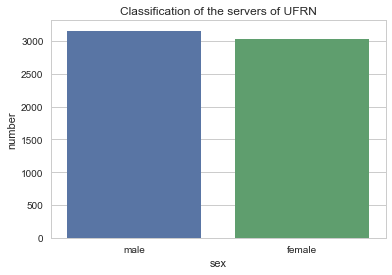

In [20]:
# Geração do gráfico dos servidores da UFRN classificados por sexo.
import seaborn as sns
import matplotlib.pyplot as plt

#to switch to seaborn defaults, simply call the set() function.
#sns.set()

# The four preset contexts, in order of relative size, are paper, notebook, talk, and poster
#sns.set_context("notebook")
sns.set(style="whitegrid", color_codes=True)

# plot a univariate distribution of observations.
#sns.countplot(x="sex", data=titanic);
fig  = sns.countplot(ListaServNameCompl["Serv_gen"]);
plt.title('Classification of the servers of UFRN')
fig.set(ylabel="number", xlabel="sex")
plt.show()

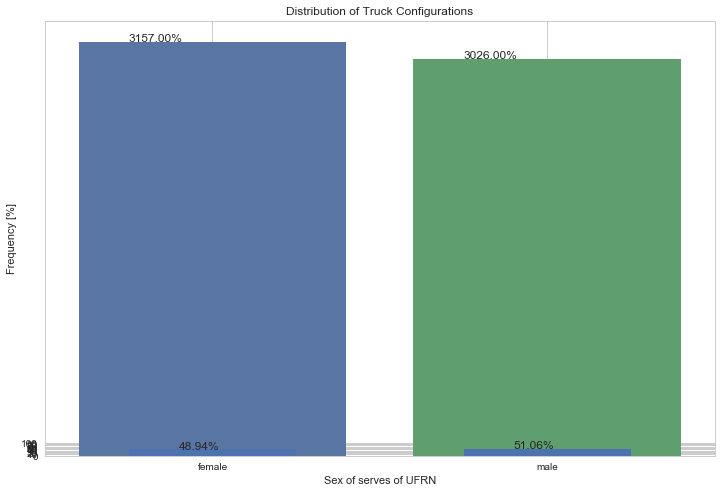

In [22]:
# Geração do gráfico dos servidores da UFRN classificados por sexo.
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#to switch to seaborn defaults, simply call the set() function.
#sns.set()

# The four preset contexts, in order of relative size, are paper, notebook, talk, and poster
#sns.set_context("notebook")
#sns.set(style="whitegrid", color_codes=True)

# plot a univariate distribution of observations.
#sns.countplot(x="sex", data=titanic);
plt.figure(figsize=(12,8))
ax  = sns.countplot(ListaServNameCompl["Serv_gen"]);
plt.title('Classification of the servers of UFRN')
#fig.set(ylabel="number", xlabel="sex")
plt.title('Distribution of Truck Configurations')
plt.xlabel('Sex of serves of UFRN')
plt.ylabel('Frequency [%]')

ax = (ListaServNameCompl.Serv_gen.value_counts()/len(ListaServNameCompl)*100).sort_inde.plot(kind="bar", rot=0)
ax.set_yticks(np.arange(0, 110, 10))
#ax2 = ax.twinx()
#ax2.set_yticks(np.arange(0, 110, 10)*len(ListaServNameCompl)/100)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
    
plt.show()

In [ ]:
var_male = ListaServNameCompl["Serv_gen"].where(ListaServNameCompl['Serv_gen'] == 'male').dropna()
var_female = ListaServNameCompl["Serv_gen"].where(ListaServNameCompl['Serv_gen'] == 'female').dropna()
print(len(var_male))
print(len(var_female))
print(ListaServNameCompl["Serv_gen"].unique())

In [13]:
ListaServNameCompl.Serv_gen.value_counts()
len(ListaServNameCompl)

6183